In [5]:
import pandas as pd
df = pd.read_excel('sample_data/data.xls')
df.loc[-1] = df.columns
df.index = df.index + 1
df = df.sort_index()
df.columns = ['X', 'Y']
df

,X,Y
0,3.1,4.5
1,2.6,3.6
2,4.5,7.0
3,2.5,3.8
4,4.5,6.5
5,2.7,4.0
6,3.9,6.1
7,4.8,7.2
8,4.5,6.7
9,3.2,4.5


Построим уравнение линейной регрессионной зависимости длины листовой пластины от ширины:

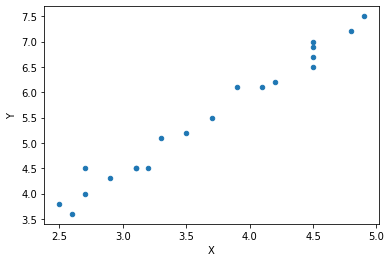

In [6]:
df.plot(x="X", y="Y", kind="scatter")

По тому, как расположены на плоскость значения проверю, что зависимость линейна:

Y = aX + b

In [11]:
import numpy as np
x_mid = np.mean(df['X'])
y_mid = np.mean(df['Y'])
x_std = np.std(df['X'])
y_std = np.std(df['Y'])
print('M(x)=', x_mid, 'M(y)=', y_mid, 's(x)=', x_std, 's(y)=', y_std)

M(x)= 3.660000000000001 M(y)= 5.485000000000001 s(x)= 0.7774316690230724 s(y)= 1.2080045529715524


In [13]:
import scipy.stats as st
r = st.pearsonr(df['X'], df['Y'])[0]
print('Коэффициент коррелиации =', r)

Коэффициент коррелиации= 0.9880305557372465


Вычислим коэффициенты a и b:

In [15]:
a = r*y_std/x_std
b = y_mid-r*y_std*x_mid/x_std
print('y =', a, '* x +', b)

y = 1.5352415618795499 * x + -0.13398411647915243


Проверим значимость уравнения регрессии и отдельных коэффициентов:

In [22]:
chisl = 0 
for i in range(df.shape[0]):
  chisl += (df['Y'][i]-a*df['X'][i]-b)**2
Sost = (chisl / (df.shape[0]-2))**(1/2)
print('Ошибка регрессии:', Sost)

Ошибка регрессии: 0.19642458188539083


In [32]:
x_mid_dubble = np.mean(df['X']**2)
Sa = Sost/(x_std*df.shape[0]**(1/2))
Sb = Sost/(x_std*df.shape[0]**(1/2))*x_mid_dubble
print('Стандартное отклонение a:', Sa)
print('Стандартное отклонение b:', Sb)

Стандартное отклонение a: 0.056496118572019825
Стандартное отклонение b: 0.7909456600082776


t-статистика:

In [33]:
ta = a/Sa
tb = b/Sb
print('ta:', ta)
print('tb:', tb)

ta: 27.174283839029805
tb: -0.1693973723526724


Критическое значение: 2,1009(при альфа=0,05)

In [36]:
control_a = control_b = False
if ta < 2.1009 :
  print('Коэффициент a незначим')
  control_a = True
if tb < 2.1009 :
  print('Коэффициент b незначим')
  control_b = True
print('Итоговое уравнение:')
if control_a:
  print('y = const + otkl')
elif control_b:
  print('y =', a, '* x')

Коэффициент b незначим
Итоговое уравнение:
y = 1.5352415618795499 * x
